In [139]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("data/raw/uk-war.csv", names=["date","time","location","lat","lon","kind","description","link"])

df

,date,time,location,lat,lon,kind,description,link
0,03/01,0040,SW Kherson,46.593879,32.571234,Ua hoisted flag,Ukrainians hoisted flag,https://twitter.com/fdov21/status/161004131337...
1,03/01,0855,SE of Pavlivka,47.739985,37.242889,Ru Position,Russian infantry shelled by Ukrainians,https://twitter.com/neonhandrail/status/161016...
2,03/01,1240,Ru units,46.687000,33.124000,BARS-4 still in Kherson,BARS-4 still in Kherson,https://twitter.com/Danspiun/status/1609996961...
3,03/01,1250,Bakhmut,48.576680,38.034390,Ru Position,71st Jaeger shelling Russian positions at Bakhmut,https://twitter.com/Danior61/status/1610237421...
4,03/01,1250,Pavlivka,47.751306,37.235094,Ru Position x 2,Russian positions shelled in Pavlivka,https://twitter.com/neonhandrail/status/161015...
...,...,...,...,...,...,...,...,...
158,16/01,2250,S of Vodyane,48.084610,37.666280,Ru Position,BMP struck by Stugna by 59th mechanized brigad...,https://twitter.com/blinzka/status/16151024117...
159,17/01,0225,W of Dibrova,49.022494,38.051074,Ru Position,80th air assault brigade shells Russian positi...,https://twitter.com/blinzka/status/16151410616...
160,17/01,1045,Verkhnokamyanske,48.866203,38.228681,Ru Position,Ua drone sneakily steals Russian radio,https://twitter.com/neonhandrail/status/161521...
161,17/01,1100,Novoselivske,49.525926,37.956265,Ua Position,Ukrainian troops use tank wreck as cover durin...,https://twitter.com/Sagakino1/status/161476698...


In [140]:
df.dropna(axis=0,how='any',subset=['lat','lon'],inplace=True)

In [141]:
# Variable with the Longitude and Latitude
X=df.loc[:,['kind','lat','lon']]
X = X[X["kind"].str.contains("Ua") == False]
X = X[X["kind"].str.contains("UA") == False]
X["kind"].info()

<class 'pandas.core.series.Series'>
Int64Index: 101 entries, 1 to 162
Series name: kind
Non-Null Count  Dtype 
--------------  ----- 
101 non-null    object
dtypes: object(1)
memory usage: 1.6+ KB


In [142]:
Y=df.loc[:,['kind','lat','lon']]
Y = Y[Y["kind"].str.contains("Ru") == False]
Y = Y[Y["kind"].str.contains("RU") == False]
Y["kind"].info()

<class 'pandas.core.series.Series'>
Int64Index: 62 entries, 0 to 161
Series name: kind
Non-Null Count  Dtype 
--------------  ----- 
62 non-null     object
dtypes: object(1)
memory usage: 992.0+ bytes


In [143]:
BBox = ((df.lon.min(),   df.lon.max(),
        df.lat.min(), df.lat.max()))
BBox

(24.993662, 38.355197, 46.565222, 51.912824)

In [144]:
ruh_m = plt.imread('map.jpeg')

/Users/vincenzomariacalandra/miniconda3/envs/troops-clustering/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/vincenzomariacalandra/miniconda3/envs/troops-clustering/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/vincenzomariacalandra/miniconda3/envs/troops-clustering/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/vincenzomariacalandra/miniconda3/envs/troops-clustering/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The defaul

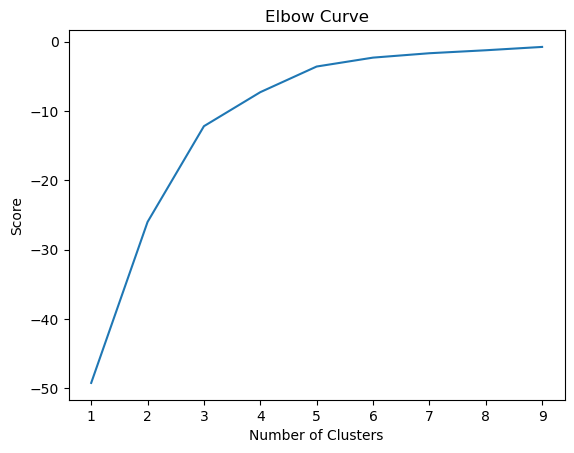

In [145]:
from sklearn.cluster import KMeans

K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = X[['lat']]
X_axis = X[['lon']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]
# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

/Users/vincenzomariacalandra/miniconda3/envs/troops-clustering/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/vincenzomariacalandra/miniconda3/envs/troops-clustering/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/vincenzomariacalandra/miniconda3/envs/troops-clustering/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/vincenzomariacalandra/miniconda3/envs/troops-clustering/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The defaul

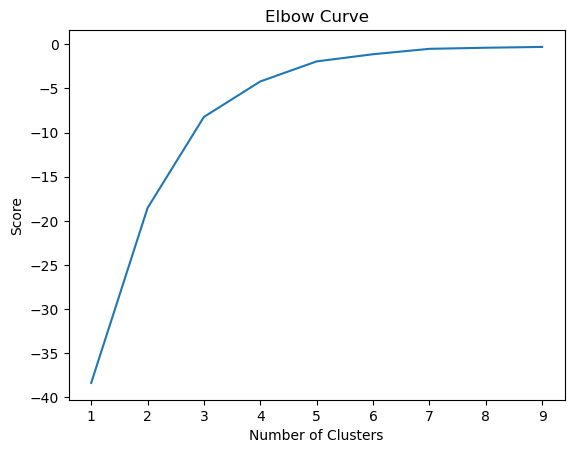

In [146]:
from sklearn.cluster import KMeans

K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = Y[['lat']]
X_axis = Y[['lon']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]
# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [153]:
kmeans = KMeans(n_clusters = 7, init ='k-means++')
kmeans.fit(X[X.columns[1:3]]) # Compute k-means clustering.
X['cluster_label'] = kmeans.fit_predict(X[X.columns[1:3]])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(X[X.columns[1:3]]) # Labels of each point
X.head(10)

/Users/vincenzomariacalandra/miniconda3/envs/troops-clustering/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/vincenzomariacalandra/miniconda3/envs/troops-clustering/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,kind,lat,lon,cluster_label
1,Ru Position,47.739985,37.242889,3
2,BARS-4 still in Kherson,46.687000,33.124000,5
3,Ru Position,48.576680,38.034390,0
4,Ru Position x 2,47.751306,37.235094,3
7,Ru Position and presence adjust,48.090561,37.738456,3
9,Ru Position,48.481492,37.932841,0
12,Ru Position,48.471386,37.960398,0
13,Ru Position and Tsunami moved,47.505410,35.983938,6
14,Ru Position,49.914065,37.782206,4
15,Ru Position,48.487650,37.921600,0


In [159]:
kmeans = KMeans(n_clusters = 7, init ='k-means++')
kmeans.fit(Y[Y.columns[1:3]]) # Compute k-means clustering.
Y['cluster_label'] = kmeans.fit_predict(Y[Y.columns[1:3]])
y_centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
y_labels = kmeans.predict(Y[Y.columns[1:3]]) # Labels of each point
Y.head(10)

/Users/vincenzomariacalandra/miniconda3/envs/troops-clustering/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/vincenzomariacalandra/miniconda3/envs/troops-clustering/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,kind,lat,lon,cluster_label
0,Ua hoisted flag,46.593879,32.571234,1
2,BARS-4 still in Kherson,46.687000,33.124000,1
8,Ua Position,48.558250,38.017462,0
10,Ua Position,48.989912,37.972644,0
11,Ua Position x 2 and presence adjust,49.017700,38.081700,0
17,Ua Position,48.127830,37.743780,3
19,Hornet Unit added and 214th OPFOR moved to Bak...,48.632190,38.002280,0
20,100th TDF position,51.912824,24.993662,2
23,Ua Position,46.840898,33.176295,1
24,67th Mechanized moved,49.748920,37.712140,5


In [160]:
y_labels = [x+7 for x in y_labels]

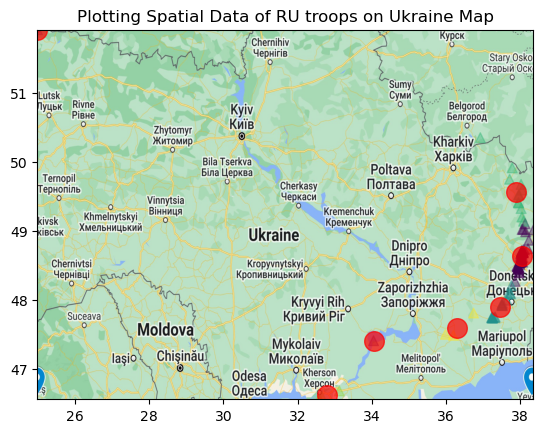

In [161]:
fig, ax = plt.subplots()
ax.scatter(X.lon, X.lat, c=labels, s=50, zorder=1, alpha= 0.4, marker='^',cmap='viridis')
ax.scatter(centers[:, 1],centers[:, 0], c='red', s=200, alpha=0.7)
ax.set_title('Plotting Spatial Data of RU troops on Ukraine Map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'auto')

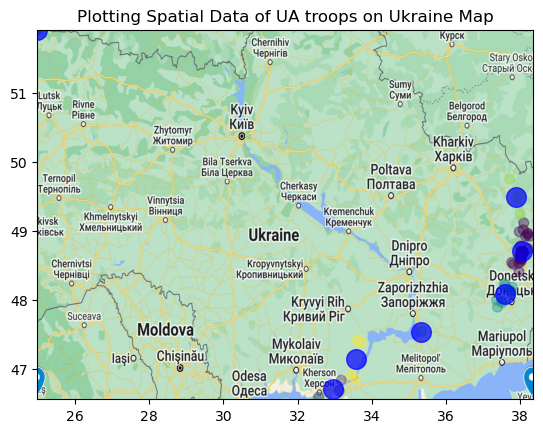

In [163]:
fig, ax = plt.subplots()
ax.scatter(Y.lon, Y.lat, c=y_labels, s=50, zorder=1, alpha= 0.4, marker='o',cmap='viridis')
ax.scatter(y_centers[:, 1],y_centers[:, 0], c='blue', s=200, alpha=0.7)
ax.set_title('Plotting Spatial Data of UA troops on Ukraine Map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'auto')

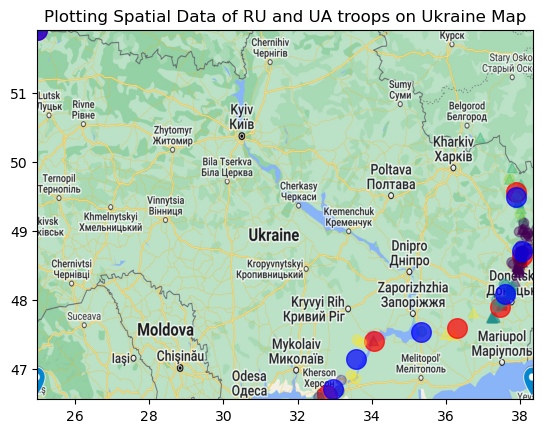

In [164]:
fig, ax = plt.subplots()
ax.scatter(X.lon, X.lat, c=labels, s=50, zorder=1, alpha= 0.4, marker='^',cmap='viridis')
ax.scatter(centers[:, 1],centers[:, 0], c='red', s=200, alpha=0.7)
ax.scatter(Y.lon, Y.lat, c=y_labels, s=50, zorder=1, alpha= 0.4, marker='o',cmap='viridis')
ax.scatter(y_centers[:, 1],y_centers[:, 0], c='blue', s=200, alpha=0.7)
ax.set_title('Plotting Spatial Data of RU and UA troops on Ukraine Map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'auto')